# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #pause for 1 second using time.sleep() - avoids the openweather API key from being disabled
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | treinta y tres
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taco pozo
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | taro
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | fort mcmurray
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | amga
Processing Record 18 of Set 1 | kerikeri
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | mount pearl
Processing Record 21 of Set 1 | novyy urgal
Processing Record 22 of 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,58.23,63,0,13.06,AU,1732727184
1,utrik,11.2278,169.8474,82.83,79,99,21.03,MH,1732727186
2,treinta y tres,-33.2333,-54.3833,74.07,88,100,4.52,UY,1732727189
3,port-aux-francais,-49.3500,70.2167,38.46,89,99,25.57,TF,1732727191
4,taco pozo,-25.6167,-63.2833,104.05,26,98,10.65,AR,1732727193


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [72]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,58.23,63,0,13.06,AU,1732727184
1,utrik,11.2278,169.8474,82.83,79,99,21.03,MH,1732727186
2,treinta y tres,-33.2333,-54.3833,74.07,88,100,4.52,UY,1732727189
3,port-aux-francais,-49.3500,70.2167,38.46,89,99,25.57,TF,1732727191
4,taco pozo,-25.6167,-63.2833,104.05,26,98,10.65,AR,1732727193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

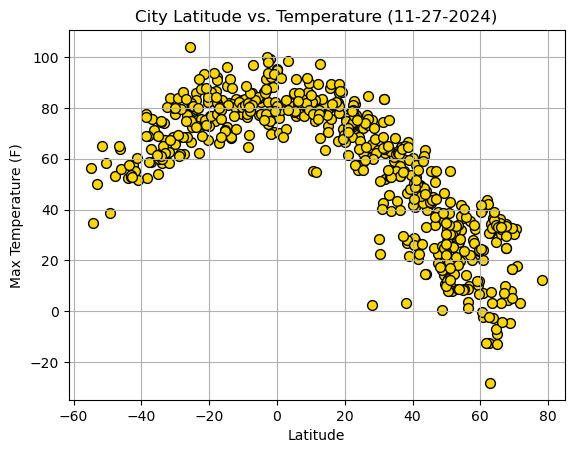

In [75]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color= "gold",
    edgecolor= "black",
    linewidths = 1,
    marker = "o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

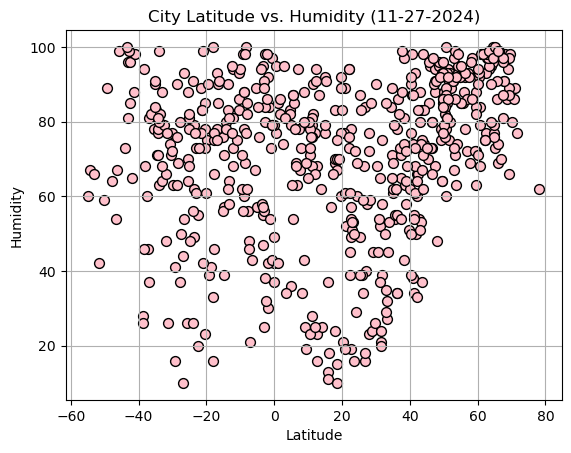

In [78]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color= "pink",
    edgecolor= "black",
    linewidths = 1,
    marker = "o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

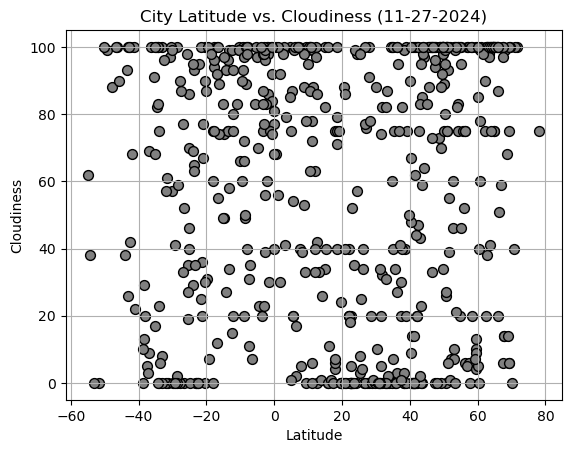

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color= "gray",
    edgecolor= "black",
    linewidths = 1,
    marker = "o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

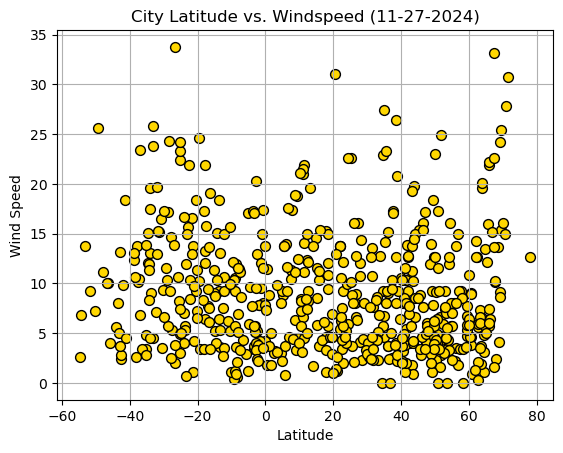

In [84]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color= "gold",
    edgecolor= "black",
    linewidths = 1,
    marker = "o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values,title, text_coordinates, color):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values= x_values * slope + intercept
    line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))

    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show

In [112]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,82.83,79,99,21.03,MH,1732727186
7,yellowknife,62.4560,-114.3525,-12.44,77,20,12.66,CA,1732727200
10,fort mcmurray,56.7268,-111.3810,9.91,72,100,14.97,CA,1732727207
15,amga,60.8953,131.9608,-2.38,98,100,0.94,RU,1732727219
18,mount pearl,47.5166,-52.7813,38.14,91,94,4.00,CA,1732727225


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,58.23,63,0,13.06,AU,1732727184
2,treinta y tres,-33.2333,-54.3833,74.07,88,100,4.52,UY,1732727189
3,port-aux-francais,-49.3500,70.2167,38.46,89,99,25.57,TF,1732727191
4,taco pozo,-25.6167,-63.2833,104.05,26,98,10.65,AR,1732727193
5,pisco,-13.7000,-76.2167,68.05,83,75,9.22,PE,1732727039


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7414301582355687


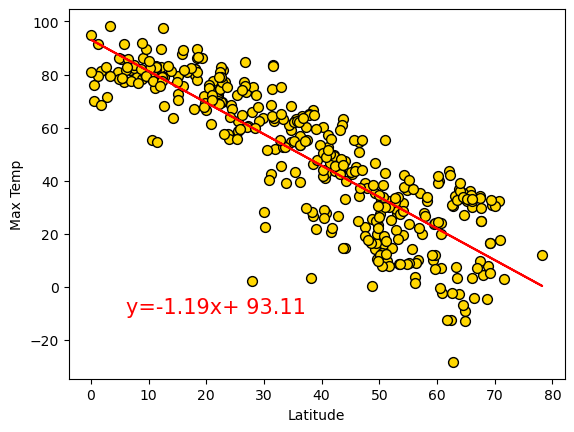

In [117]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "gold")

The r-value is: 0.5023326146436254


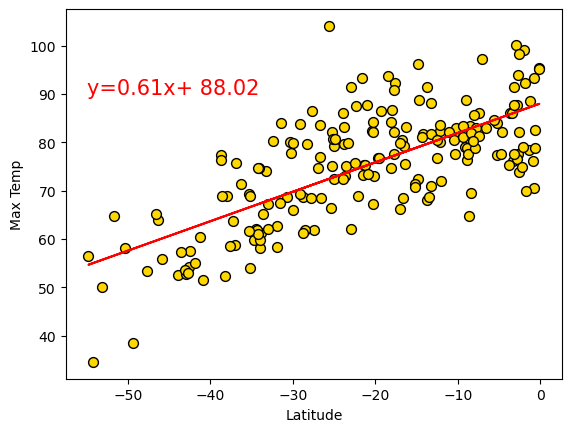

In [124]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90), "gold")

**Discussion about the linear relationship:** The high r value indicates a strong positive, correlation between latitude and max temperatures. R values ~ 0.2 indicates that there is a weak positive correlation in the southern hemisphere (due to season).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1879704283017346


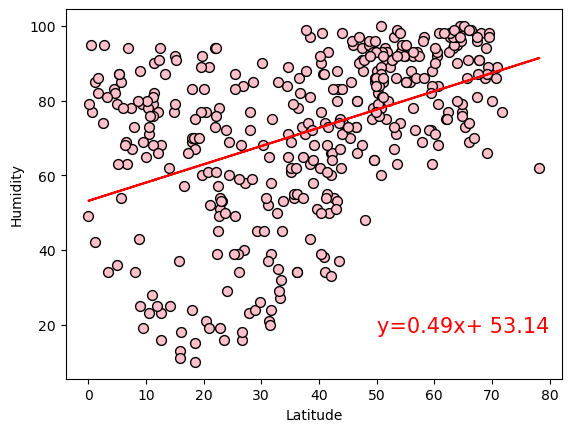

In [131]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,18), "pink")

The r-value is: 0.00022757417702423425


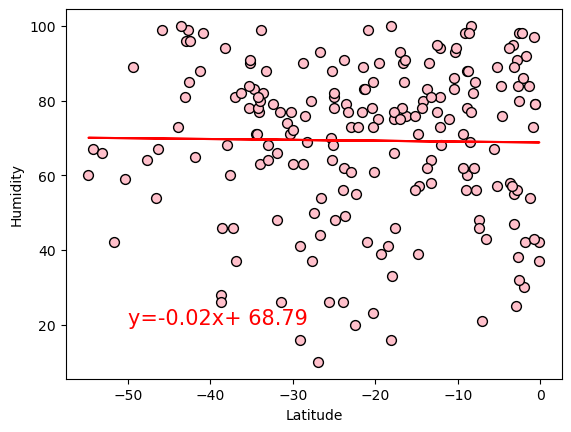

In [143]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50,20), "pink")

**Discussion about the linear relationship:** The low r values indicate a weak to no realtionship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0317760827711213


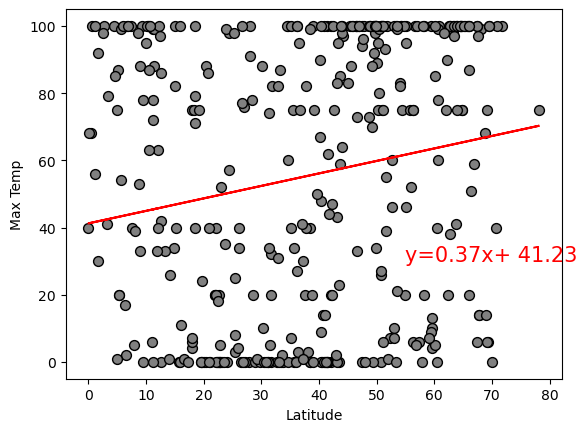

In [149]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp", (55,30), "gray")

The r-value is: 0.051964084330280325


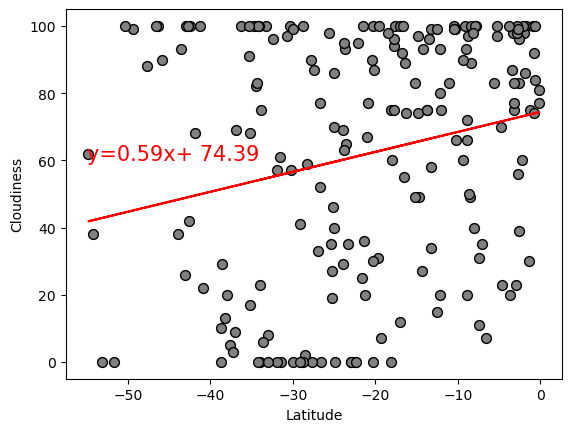

In [155]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,60), "gray")

**Discussion about the linear relationship:** The low r value indicates a weak realtionship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0003509769599726411


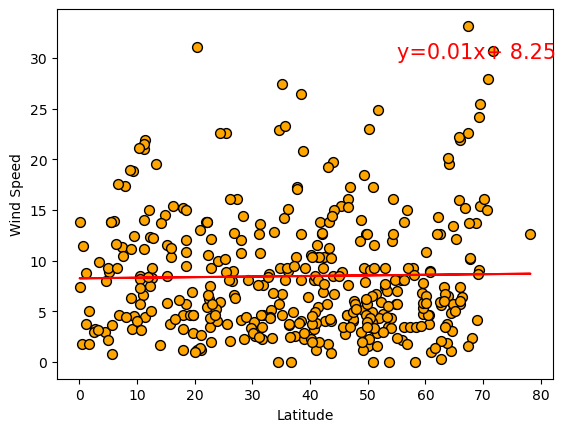

In [160]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (55,30), "orange")

The r-value is: 0.02547540125929358


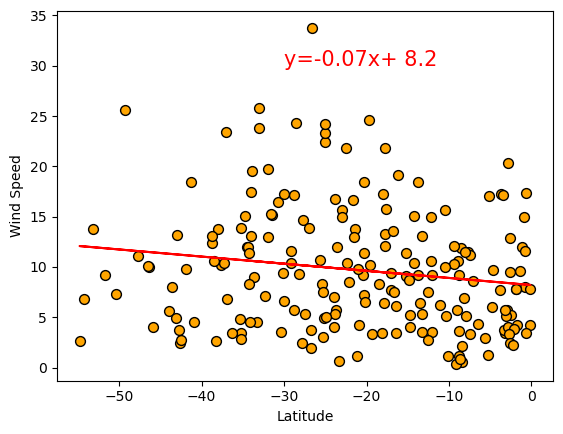

In [166]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30,30), "orange")

**Discussion about the linear relationship:** The low r value indicates a weak realtionship between wind speed and latitude.